In [38]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import numpy as np
import pandas as pd
from helpers import load_csv_data,create_csv_submission
import implementation
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import seaborn as sns

In [3]:
yb, input_data, ids = load_csv_data("./data/train.csv")

In [7]:
a,b=np.unique(yb,return_counts=True)
percent_b_1neg,percent_b_1pos = b[0]/yb.shape[0],b[1]/yb.shape[0]
print(a,b,percent_b_1neg*100,percent_b_1pos*100,)


[-1.  1.] [164333  85667] 65.7332 34.266799999999996


In [42]:
data_frame_input_data = pd.DataFrame(input_data)
data_frame_input_data.columns = ["DER_mass_MMC","DER_mass_transverse_met_lep","DER_mass_vis","DER_pt_h","DER_deltaeta_jet_jet","DER_mass_jet_jet","DER_prodeta_jet_jet","DER_deltar_tau_lep","DER_pt_tot","DER_sum_pt","DER_pt_ratio_lep_tau","DER_met_phi_centrality","DER_lep_eta_centrality","PRI_tau_pt","PRI_tau_eta","PRI_tau_phi","PRI_lep_pt","PRI_lep_eta","PRI_lep_phi","PRI_met","PRI_met_phi","PRI_met_sumet","PRI_jet_num","PRI_jet_leading_pt","PRI_jet_leading_eta","PRI_jet_leading_phi","PRI_jet_subleading_pt","PRI_jet_subleading_eta","PRI_jet_subleading_phi","PRI_jet_all_pt"]


In [70]:
data_frame_input_data.describe()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,...,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,-49.023079,49.239819,81.181982,57.895962,-708.420675,-601.237051,-709.356603,2.373100,18.917332,158.432217,...,-0.010119,209.797178,0.979176,-348.329567,-399.254314,-399.259788,-692.381204,-709.121609,-709.118631,73.064591
std,406.345647,35.344886,40.828691,63.655682,454.480565,657.972302,453.019877,0.782911,22.273494,115.706115,...,1.812223,126.499506,0.977426,532.962789,489.338286,489.333883,479.875496,453.384624,453.389017,98.015662
min,-999.000000,0.000000,6.329000,0.000000,-999.000000,-999.000000,-999.000000,0.208000,0.000000,46.104000,...,-3.142000,13.678000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000
25%,78.100750,19.241000,59.388750,14.068750,-999.000000,-999.000000,-999.000000,1.810000,2.841000,77.550000,...,-1.575000,123.017500,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000
50%,105.012000,46.524000,73.752000,38.467500,-999.000000,-999.000000,-999.000000,2.491500,12.315500,120.664500,...,-0.024000,179.739000,1.000000,38.960000,-1.872000,-2.093000,-999.000000,-999.000000,-999.000000,40.512500
75%,130.606250,73.598000,92.259000,79.169000,0.490000,83.446000,-4.593000,2.961000,27.591000,200.478250,...,1.561000,263.379250,2.000000,75.349000,0.433000,0.503000,33.703000,-2.457000,-2.275000,109.933750
max,1192.026000,690.075000,1349.351000,2834.999000,8.503000,4974.979000,16.690000,5.684000,2834.999000,1852.462000,...,3.142000,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000


In [43]:
print(data_frame_input_data.mean().min())
print(data_frame_input_data.mean().max())
print(data_frame_input_data.std().min())
print(data_frame_input_data.std().max())

-709.3566029000048
209.79717763200114
0.7829111186453125
657.9723021131681


<AxesSubplot: >

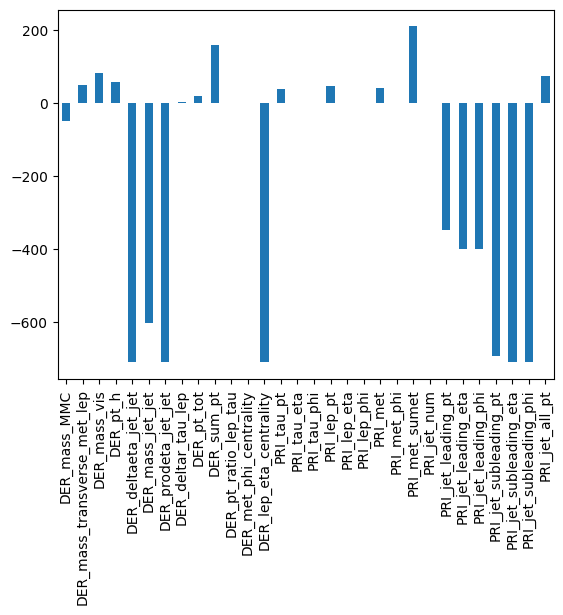

In [44]:
data_frame_input_data.mean().plot(kind = 'bar')



<AxesSubplot: >

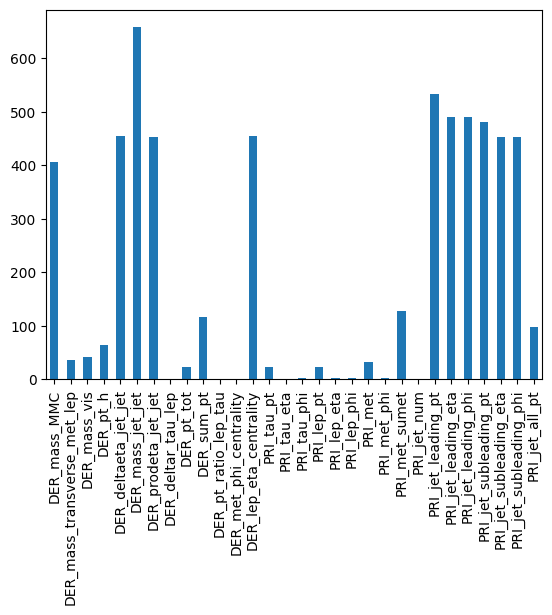

In [45]:
data_frame_input_data.std().plot(kind = 'bar')

In [46]:
data_frame_input_data_normalized = data_frame_input_data.copy()

In [47]:
for col in data_frame_input_data_normalized.columns:
    data_frame_input_data_normalized[col] = (data_frame_input_data_normalized[col] - data_frame_input_data_normalized[col].mean()) / data_frame_input_data_normalized[col].std() 

<AxesSubplot: >

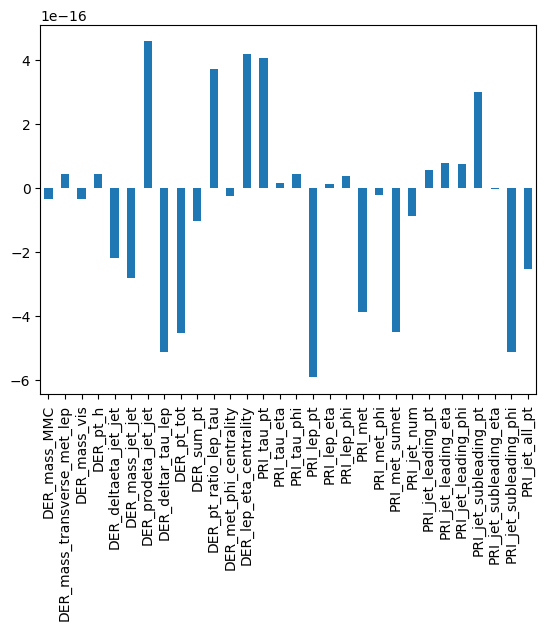

In [48]:
data_frame_input_data_normalized.mean().plot(kind = 'bar')


In [49]:
data_frame_input_data_normalized_with_label = data_frame_input_data_normalized.copy()
data_frame_input_data_normalized_with_label.columns = ["DER_mass_MMC","DER_mass_transverse_met_lep","DER_mass_vis","DER_pt_h","DER_deltaeta_jet_jet","DER_mass_jet_jet","DER_prodeta_jet_jet","DER_deltar_tau_lep","DER_pt_tot","DER_sum_pt","DER_pt_ratio_lep_tau","DER_met_phi_centrality","DER_lep_eta_centrality","PRI_tau_pt","PRI_tau_eta","PRI_tau_phi","PRI_lep_pt","PRI_lep_eta","PRI_lep_phi","PRI_met","PRI_met_phi","PRI_met_sumet","PRI_jet_num","PRI_jet_leading_pt","PRI_jet_leading_eta","PRI_jet_leading_phi","PRI_jet_subleading_pt","PRI_jet_subleading_eta","PRI_jet_subleading_phi","PRI_jet_all_pt"]
data_frame_input_data_normalized_with_label["Prediction"] = yb


Be carefull while looking at the plots below, the Full distribution isn't simply both graphs to the right added up. 
Since I'm using the parameter "density=True" it will scale each histogram in a way that the sum per graph = 1

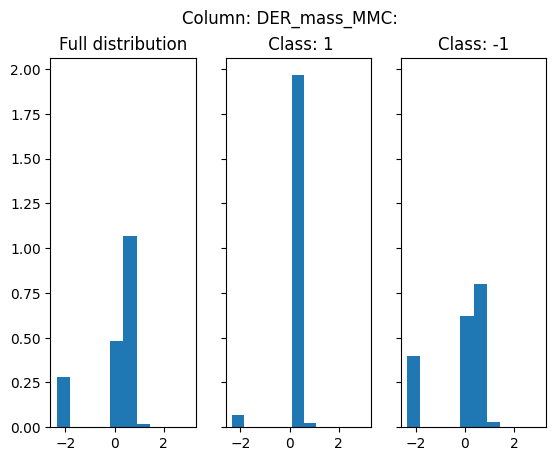

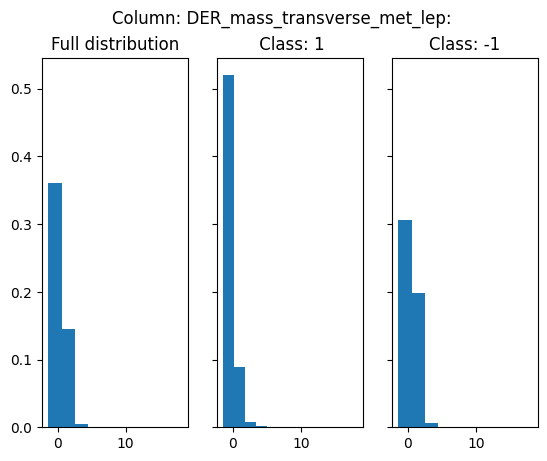

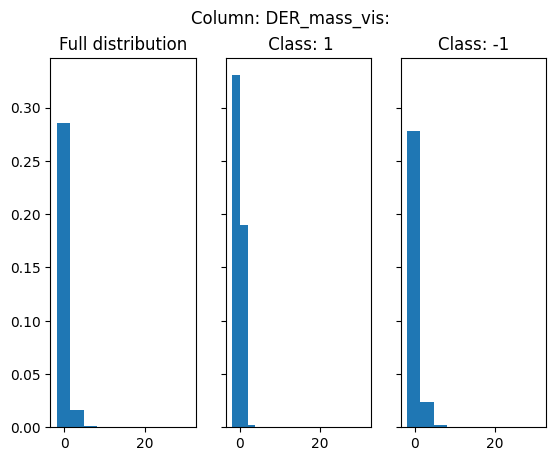

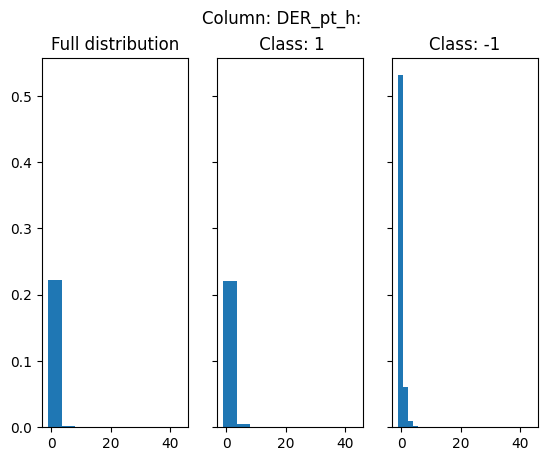

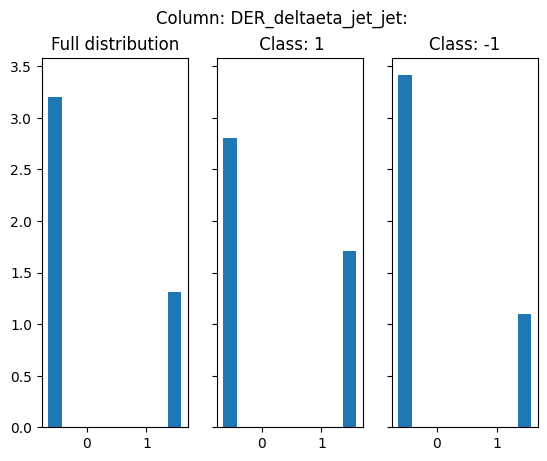

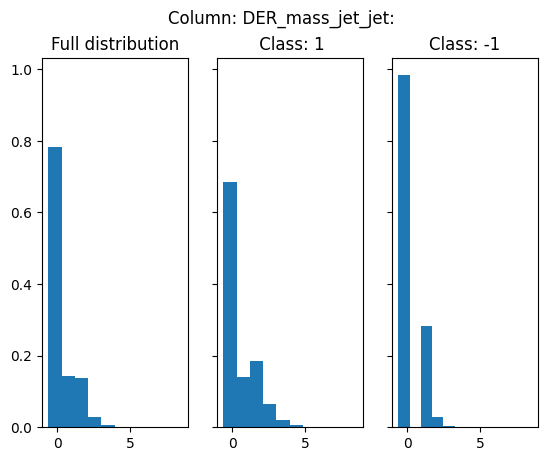

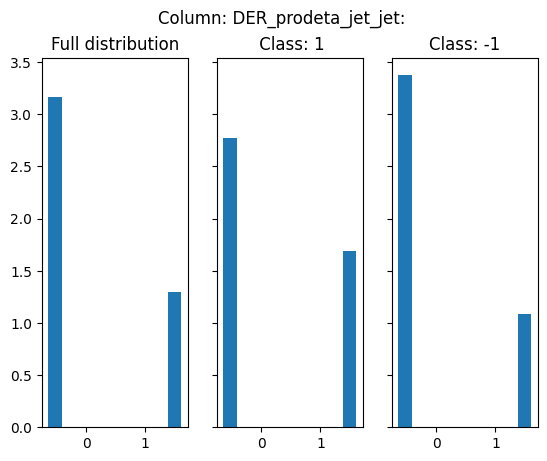

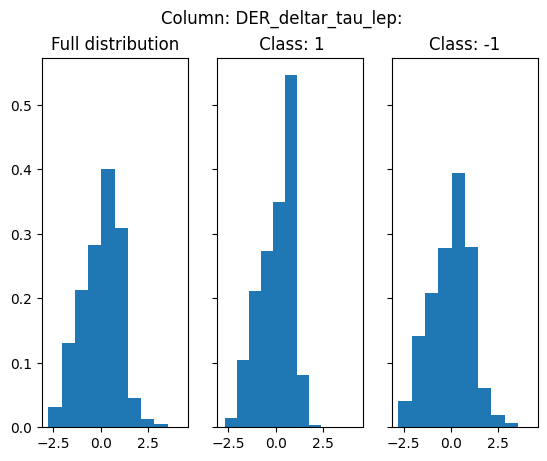

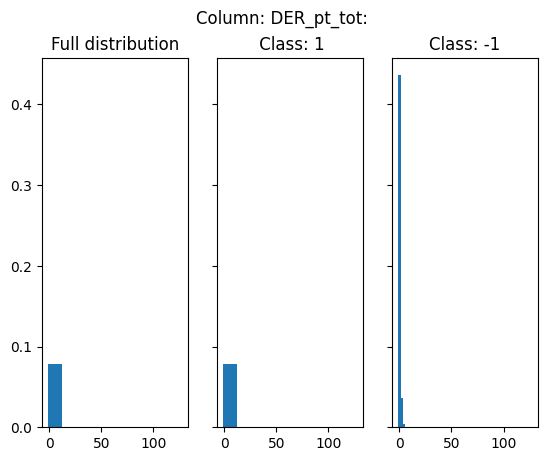

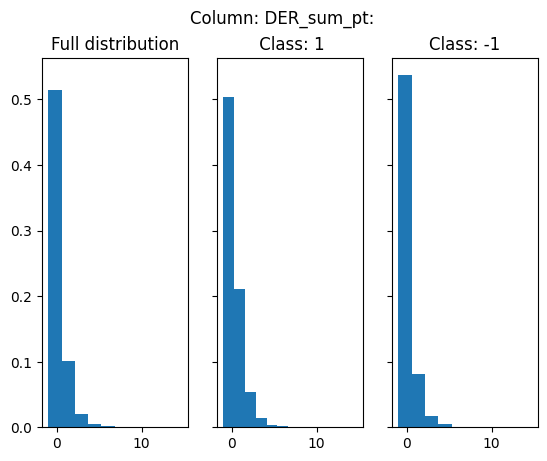

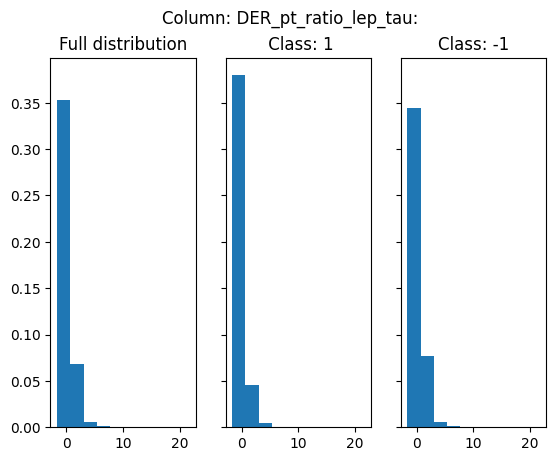

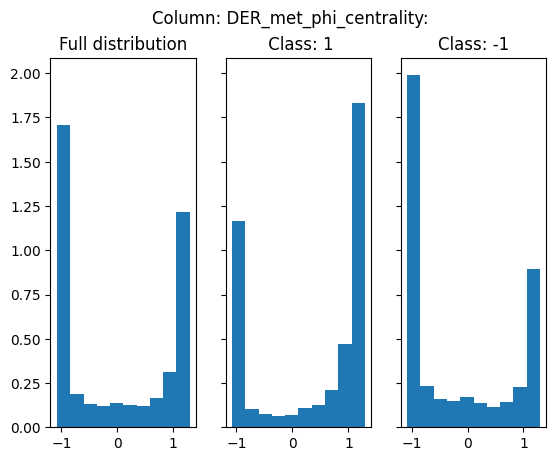

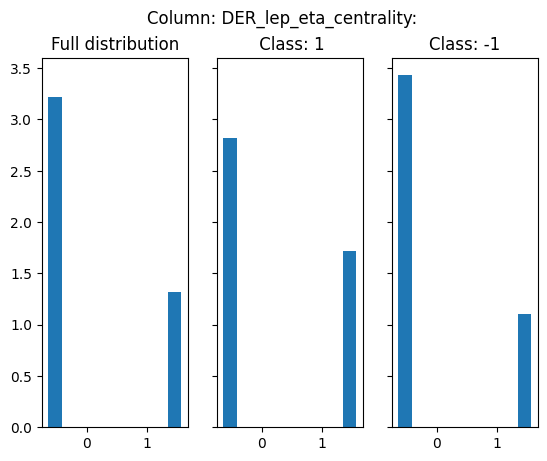

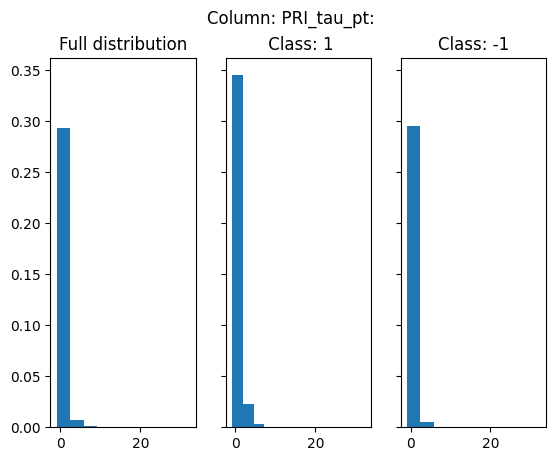

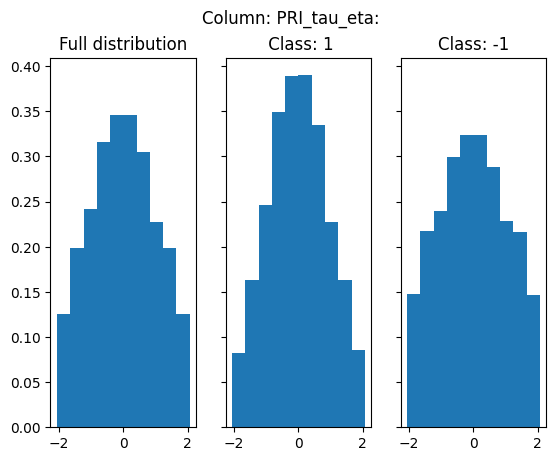

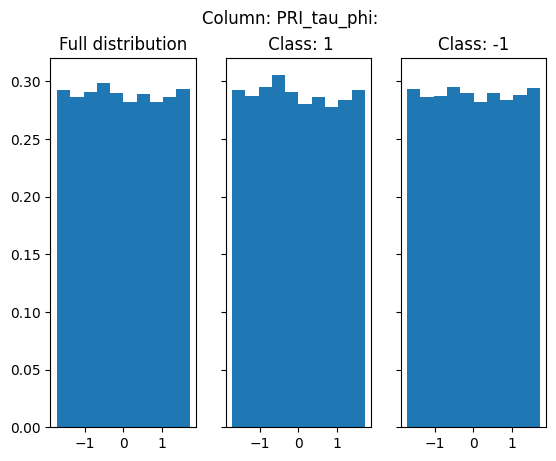

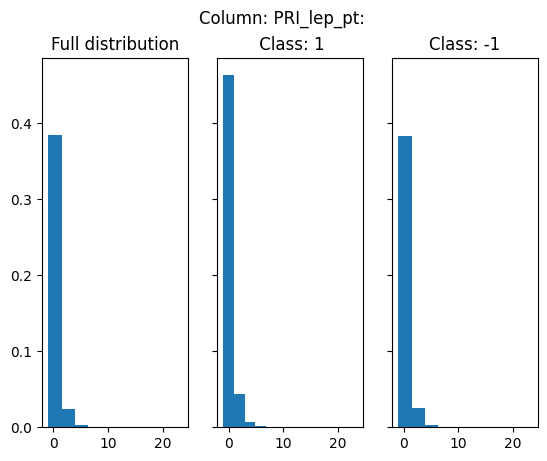

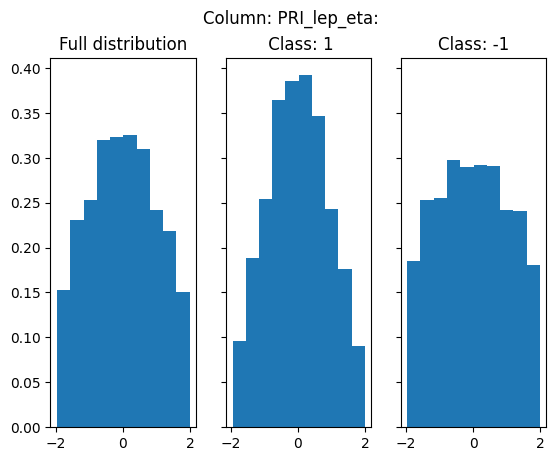

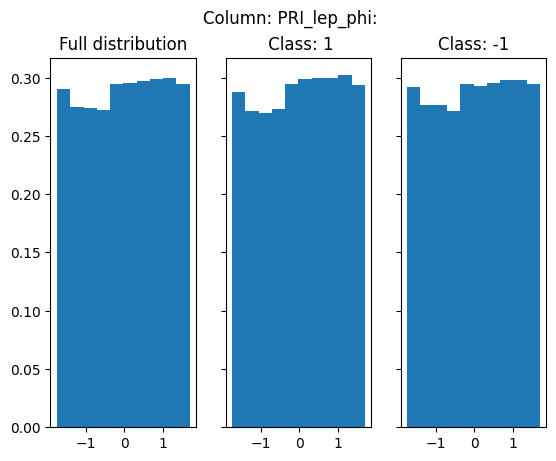

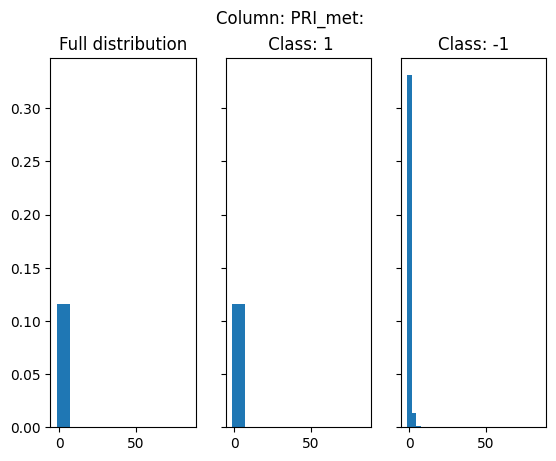

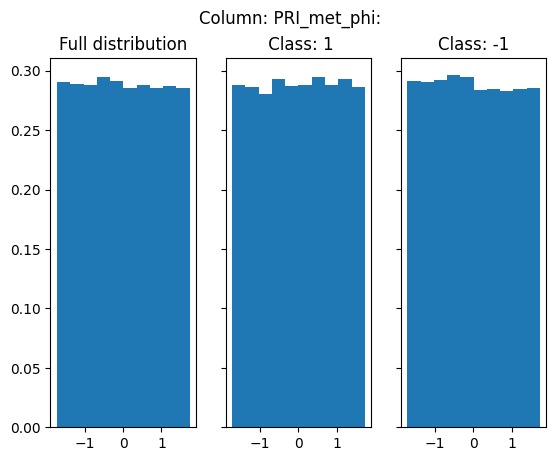

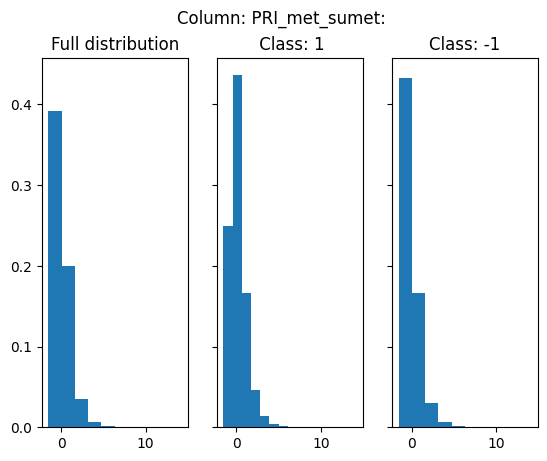

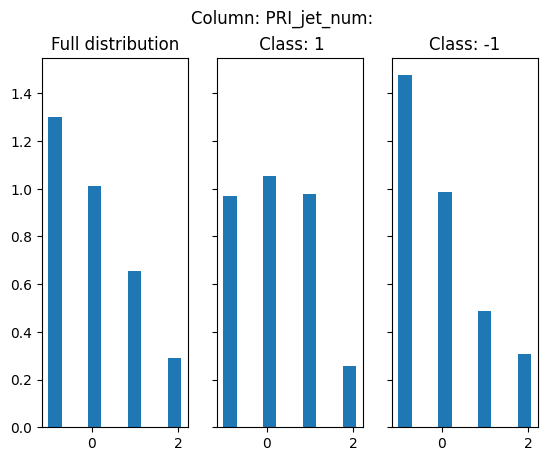

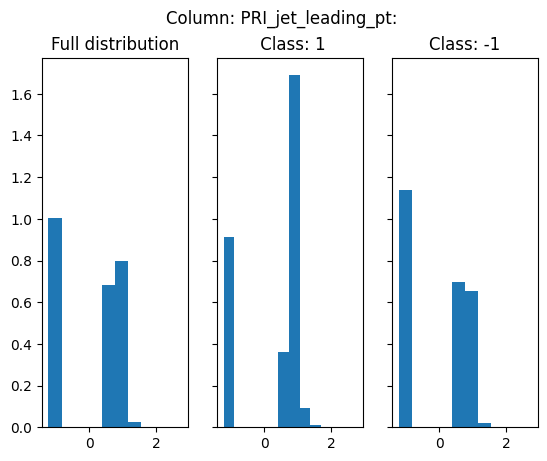

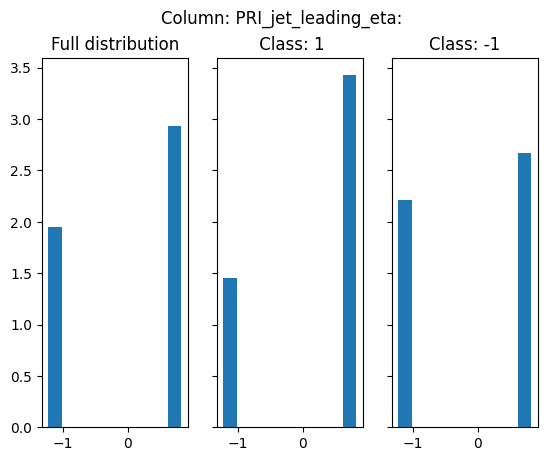

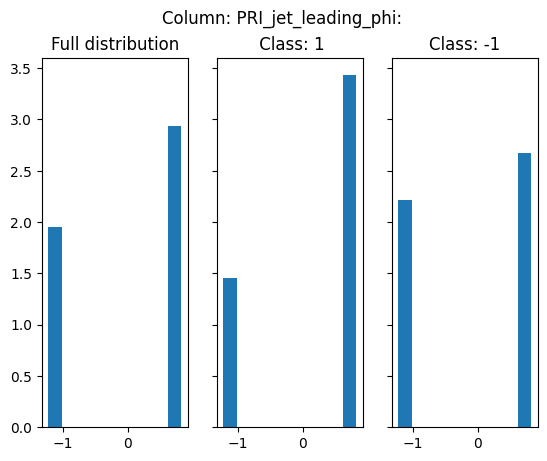

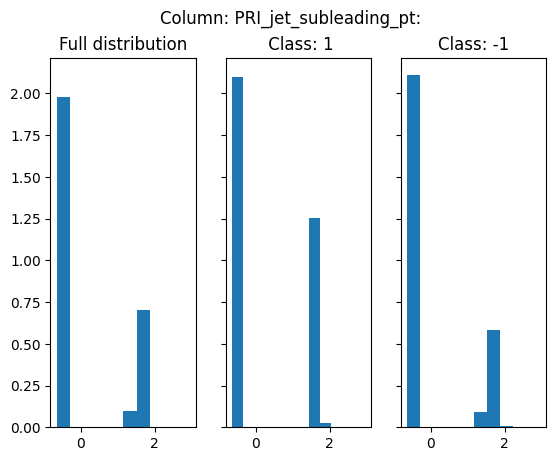

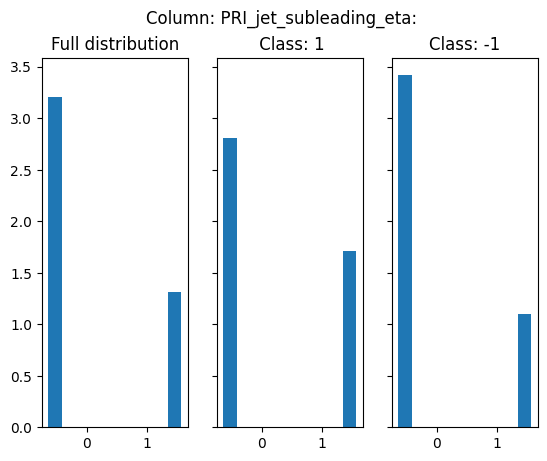

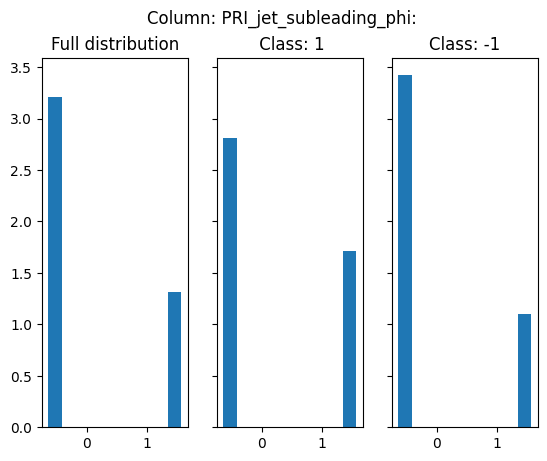

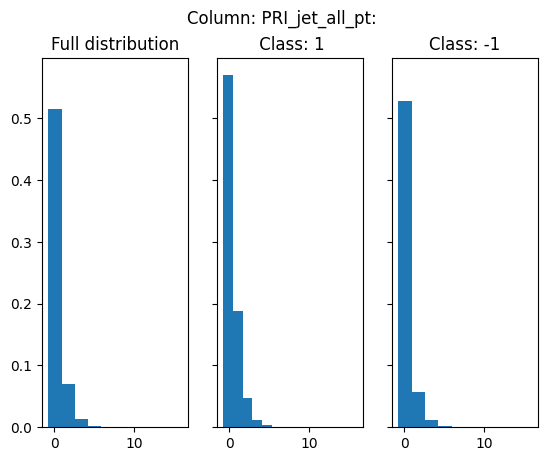

In [66]:
for col in data_frame_input_data_normalized_with_label.columns[:-1]:
    fig, (ax1, ax2,ax3) = plt.subplots(1, 3, sharey=True,sharex=True)
    fig.suptitle(f"Column: {col}:")
    
    ax1.hist(data_frame_input_data_normalized_with_label[col],density=True)
    ax1.set_title(f"Full distribution")

    ax2.set_title(" Class: 1",loc="center")
    ax2.hist(data_frame_input_data_normalized_with_label.query('Prediction==1')[col],density=True)
    ax3.hist(data_frame_input_data_normalized_with_label.query('Prediction==-1')[col],density=True)
    ax3.set_title("Class: -1")
    plt.show()

In [51]:
data_frame_input_data_normalized_with_label

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Prediction
0,0.461413,0.068332,0.407679,-0.469965,1.560750,1.103311,1.571725,0.882476,1.033096,0.339894,...,0.386846,1.044400,0.780101,0.820300,0.816832,1.538822,1.566797,1.558581,0.412510,1.0
1,0.516703,0.552504,0.540135,-0.153167,-0.639366,-0.604528,-0.639361,1.404885,-0.756026,-0.287584,...,-0.357718,0.021305,0.740306,0.817388,0.818292,-0.638955,-0.639365,-0.639366,-0.273819,-1.0
2,-2.337854,3.195149,1.096558,-0.349709,-0.639366,-0.604528,-0.639361,0.989768,-0.430167,0.340360,...,0.400135,0.021305,0.736600,0.820102,0.811781,-0.638955,-0.639365,-0.639366,-0.293969,-1.0
3,0.474788,0.910377,-0.005853,-0.903014,-0.639366,-0.604528,-0.639361,1.196688,-0.830733,-0.712704,...,-0.978148,-1.001790,-1.220855,-1.225626,-1.225626,-0.638955,-0.639365,-0.639366,-0.745438,-1.0
4,0.553438,-0.914554,1.313366,-0.651803,-0.639366,-0.604528,-0.639361,1.938790,-0.112795,-0.868141,...,-1.238473,-1.001790,-1.220855,-1.225626,-1.225626,-0.638955,-0.639365,-0.639366,-0.745438,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,-2.337854,0.643634,-1.093201,-0.830310,-0.639366,-0.604528,-0.639361,-1.253143,-0.622953,-0.886213,...,-0.514881,-1.001790,-1.220855,-1.225626,-1.225626,-0.638955,-0.639365,-0.639366,-0.745438,-1.0
249996,-2.337854,0.252913,-0.320828,-0.557012,-0.639366,-0.604528,-0.639361,0.270657,0.158110,-0.931794,...,-1.022843,-1.001790,-1.220855,-1.225626,-1.225626,-0.638955,-0.639365,-0.639366,-0.745438,-1.0
249997,0.380169,0.319316,-0.130863,-0.284954,-0.639366,-0.604528,-0.639361,0.021586,0.146617,-0.328161,...,-0.086089,0.021305,0.732362,0.819585,0.815586,-0.638955,-0.639365,-0.639366,-0.317017,1.0
249998,0.354314,-0.845322,-0.302973,-0.697376,-0.639366,-0.604528,-0.639361,1.266938,-0.243039,-0.886498,...,-0.767427,-1.001790,-1.220855,-1.225626,-1.225626,-0.638955,-0.639365,-0.639366,-0.745438,-1.0


In [52]:



cm = sns.light_palette("red", as_cmap=True)
data_frame_input_data_normalized_with_label.groupby('Prediction').cov().style.background_gradient(cmap=cm).set_precision(2)

/tmp/ipykernel_49723/922947016.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  data_frame_input_data_normalized_with_label.groupby('Prediction').cov().style.background_gradient(cmap=cm).set_precision(2)


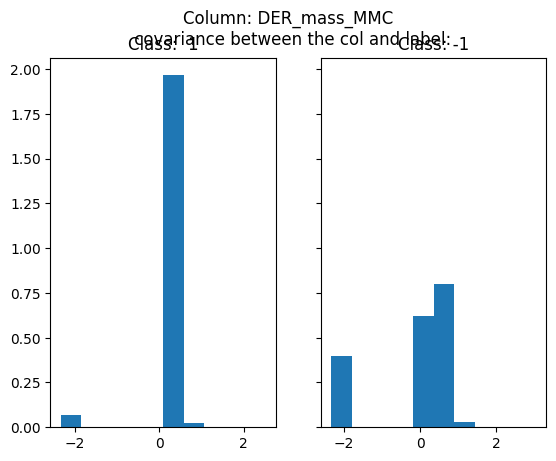

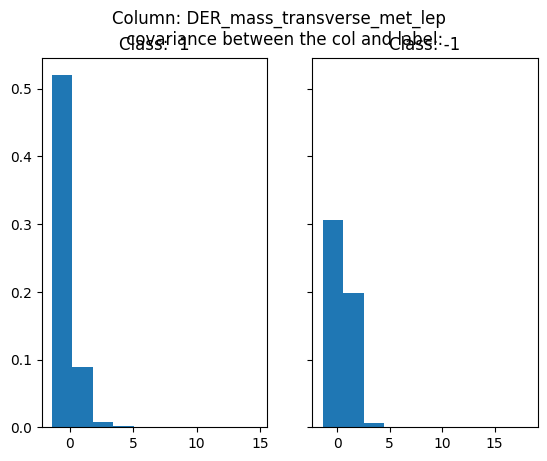

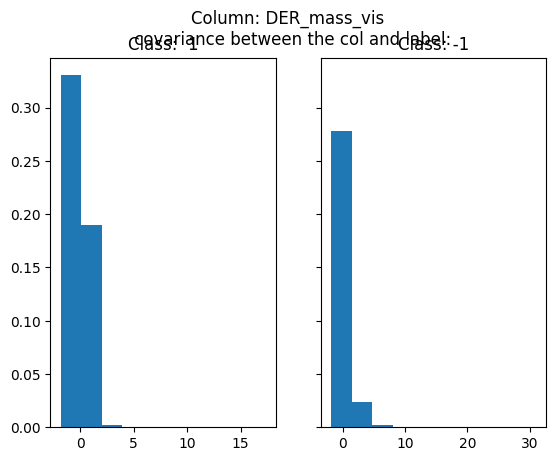

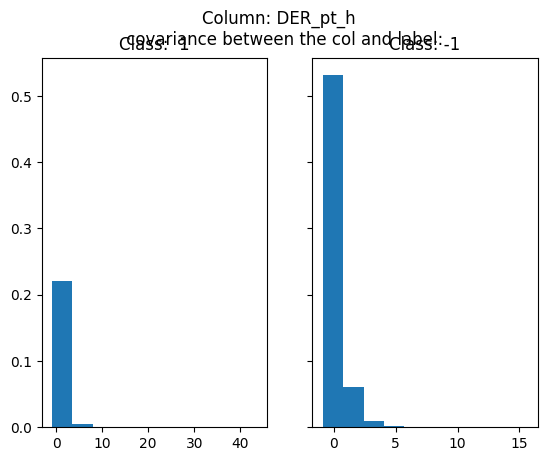

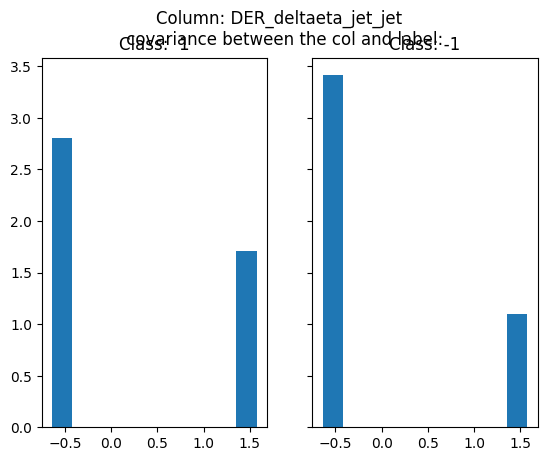

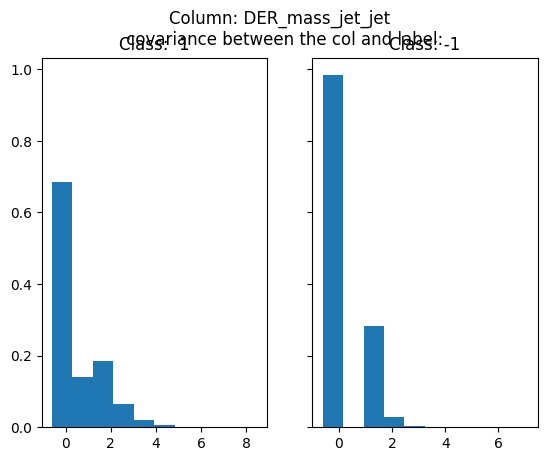

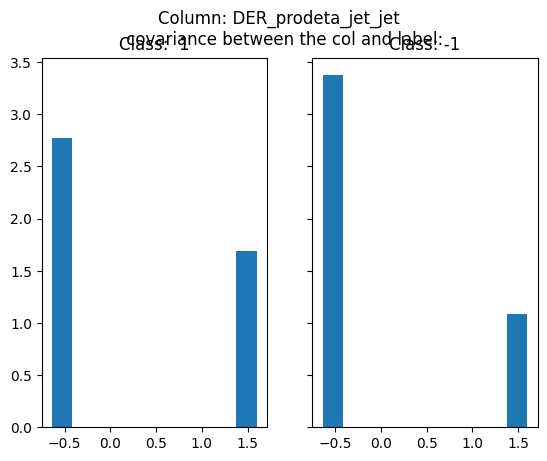

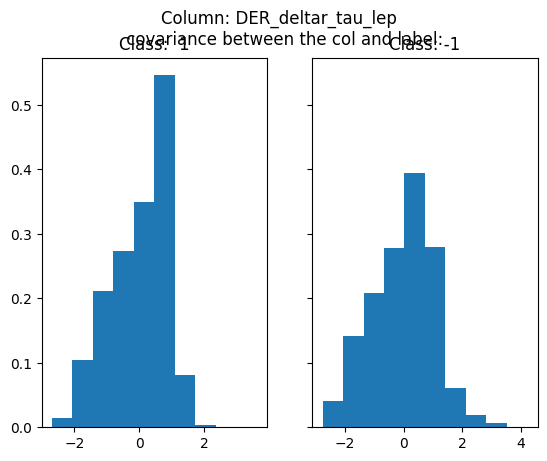

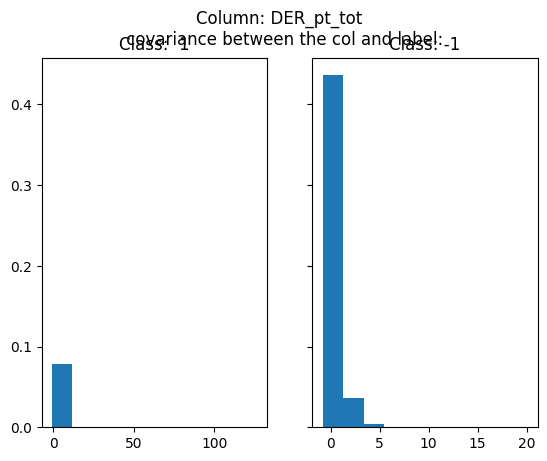

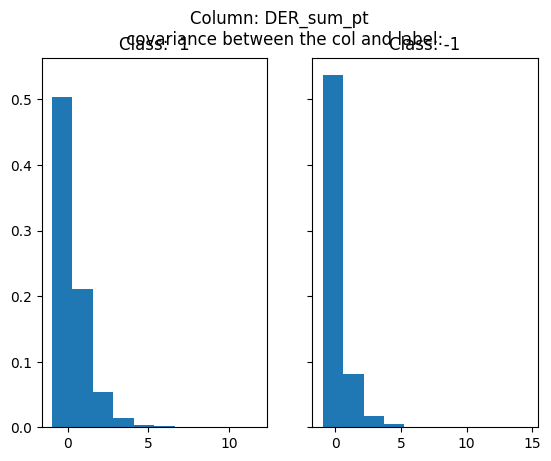

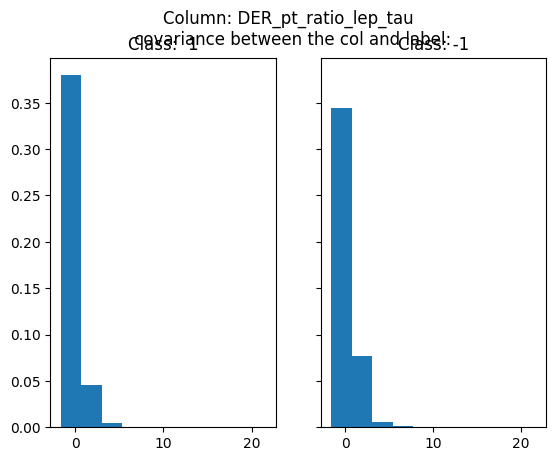

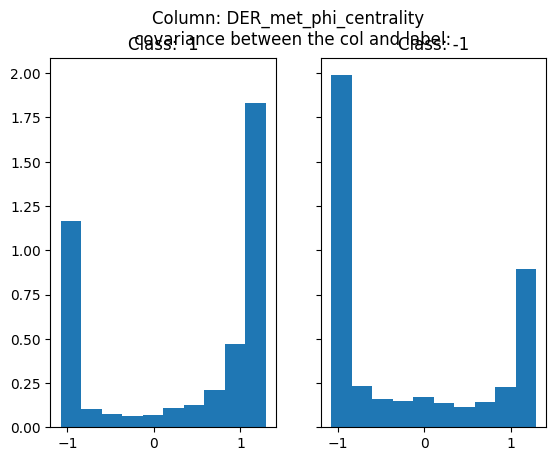

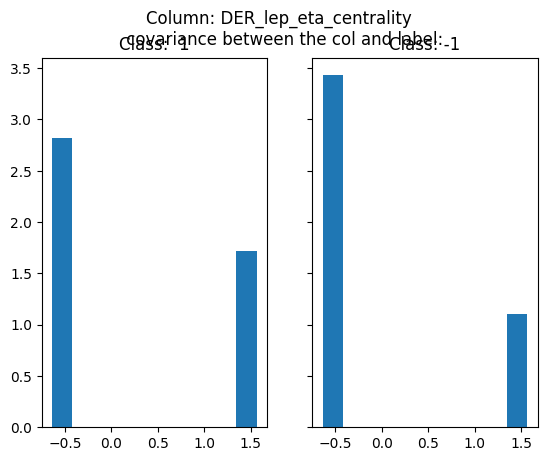

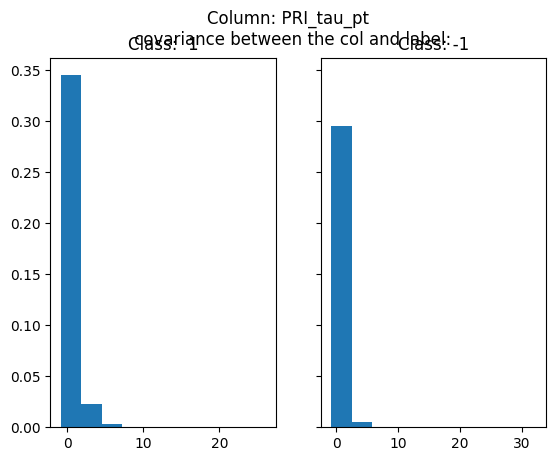

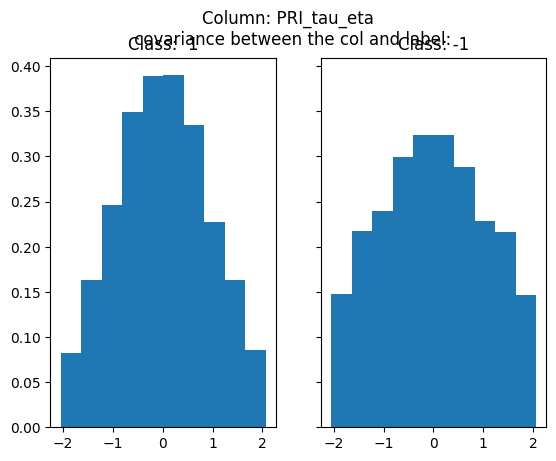

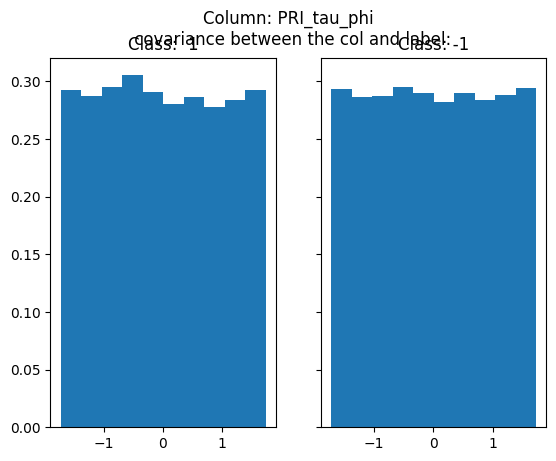

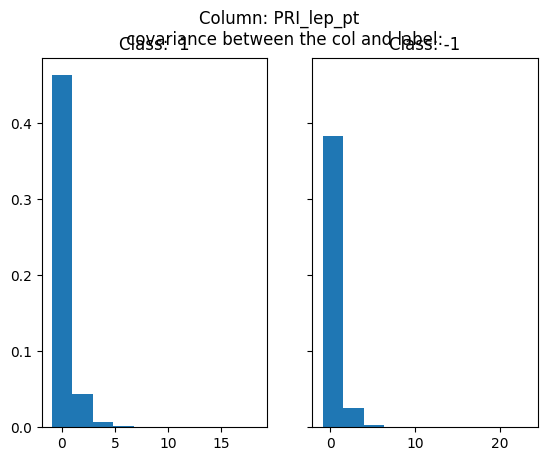

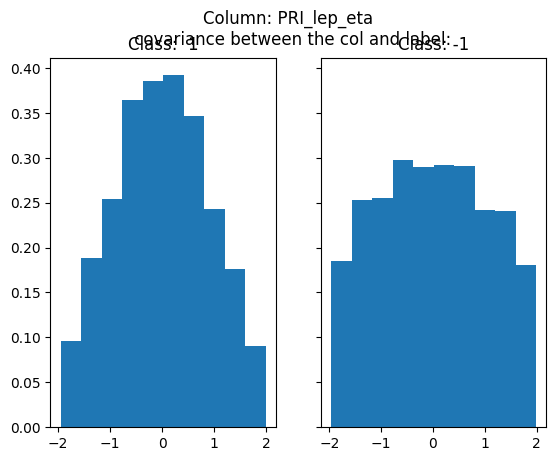

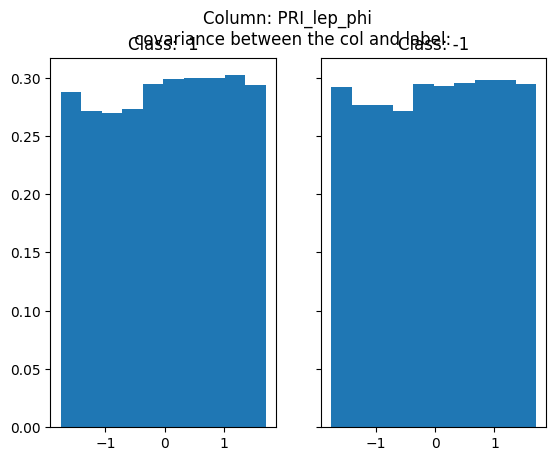

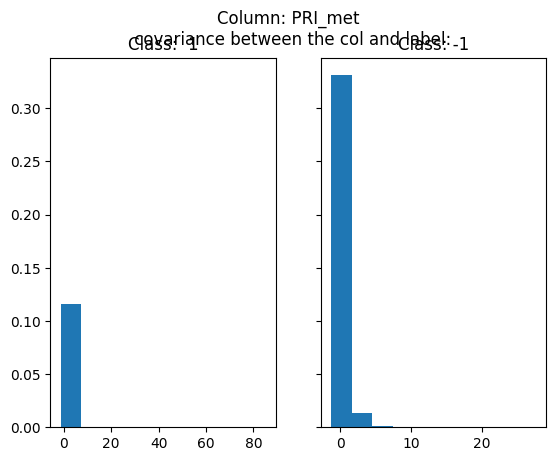

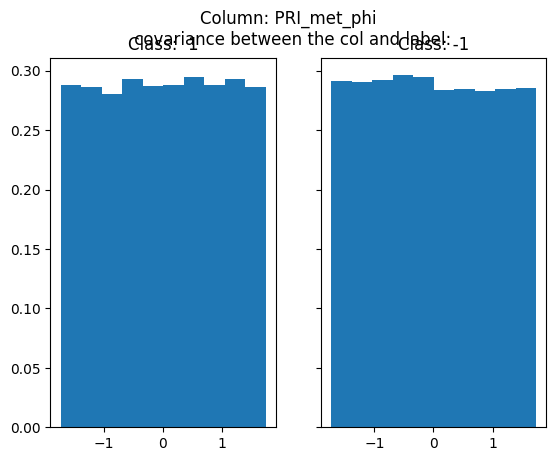

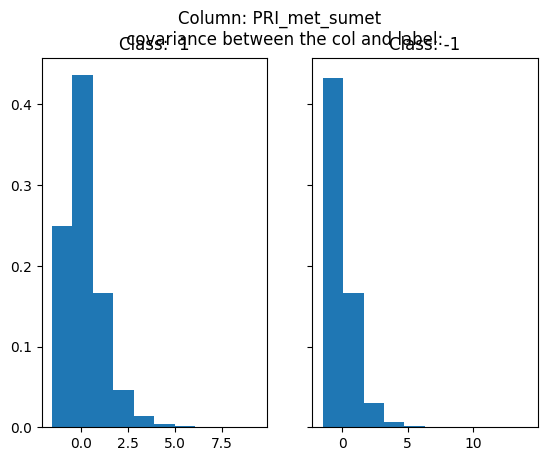

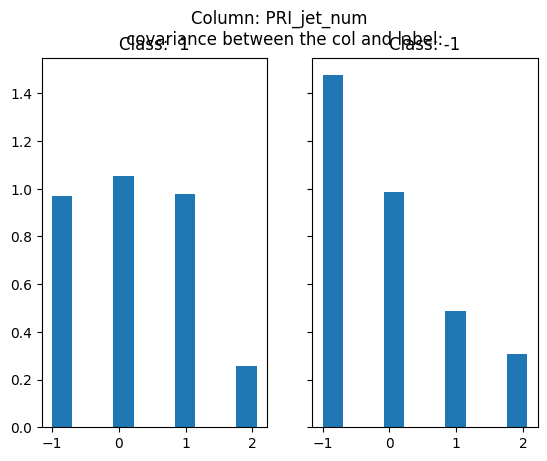

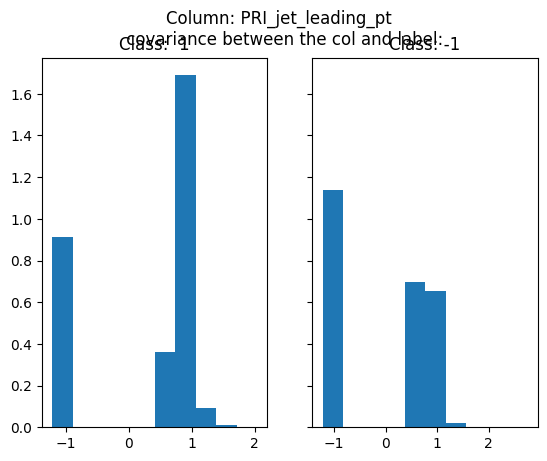

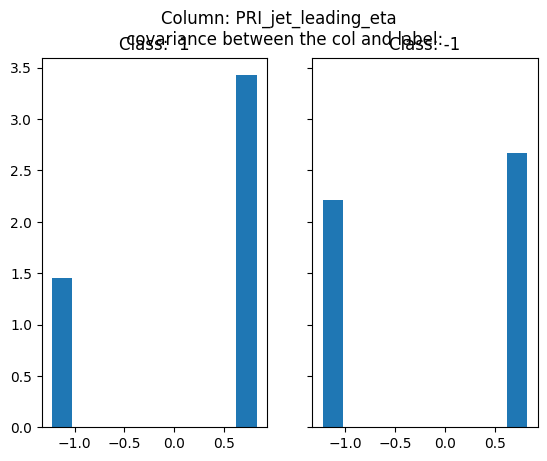

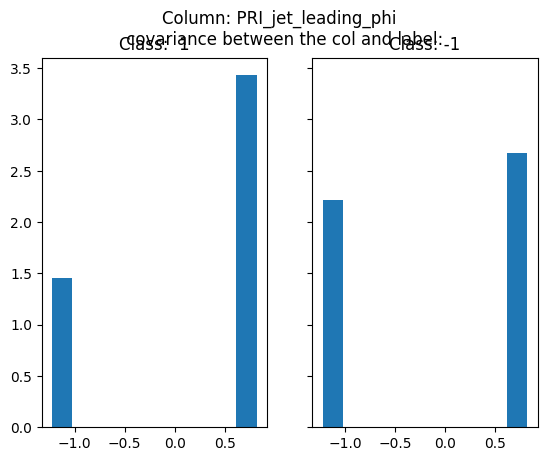

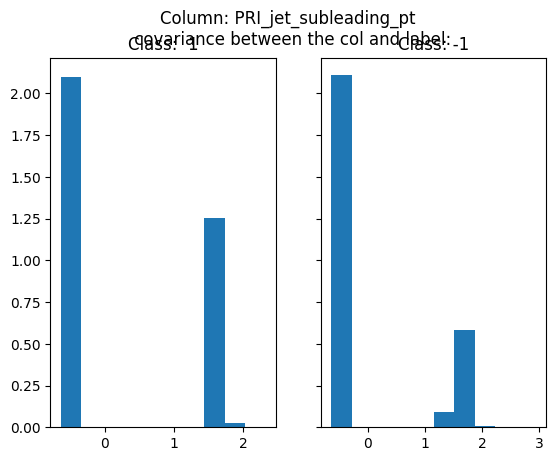

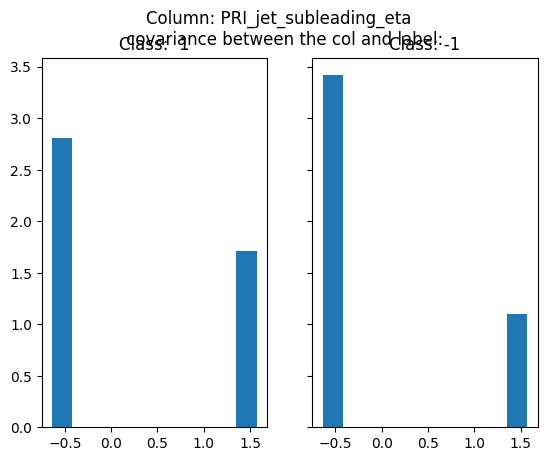

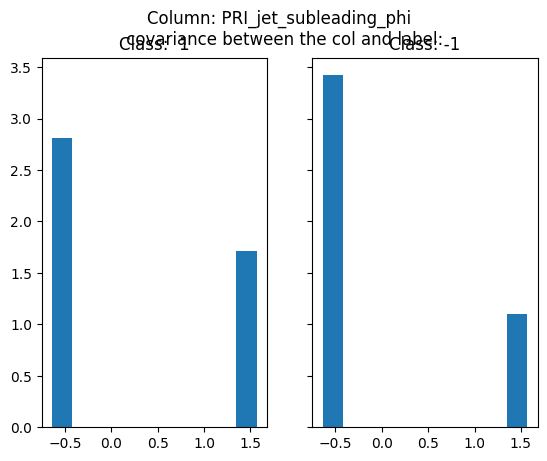

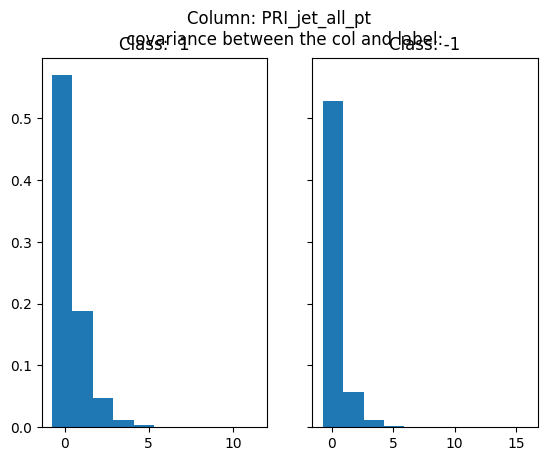

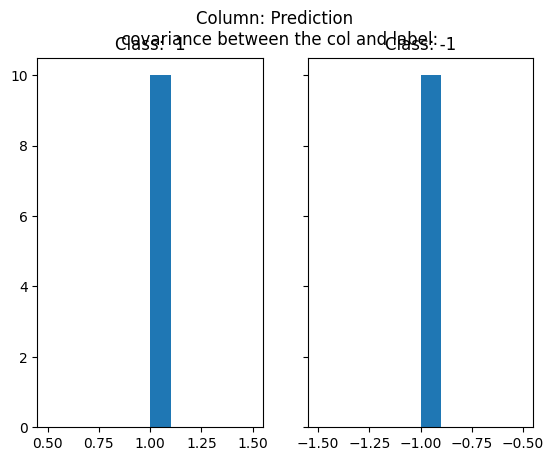

In [67]:
for col in data_frame_input_data_normalized_with_label.columns:
    fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
    fig.suptitle(f"Column: {col} \n covariance between the col and label:")
    ax1.set_title("Class:  1",loc="center")
    ax2.set_title("Class: -1")
    ax1.hist(data_frame_input_data_normalized_with_label.query('Prediction==1')[col],density=True)
    ax2.hist(data_frame_input_data_normalized_with_label.query('Prediction==-1')[col],density=True)
    plt.show()

In [54]:
data_frame_input_data.columns = ["DER_mass_MMC","DER_mass_transverse_met_lep","DER_mass_vis","DER_pt_h","DER_deltaeta_jet_jet","DER_mass_jet_jet","DER_prodeta_jet_jet","DER_deltar_tau_lep","DER_pt_tot","DER_sum_pt","DER_pt_ratio_lep_tau","DER_met_phi_centrality","DER_lep_eta_centrality","PRI_tau_pt","PRI_tau_eta","PRI_tau_phi","PRI_lep_pt","PRI_lep_eta","PRI_lep_phi","PRI_met","PRI_met_phi","PRI_met_sumet","PRI_jet_num","PRI_jet_leading_pt","PRI_jet_leading_eta","PRI_jet_leading_phi","PRI_jet_subleading_pt","PRI_jet_subleading_eta","PRI_jet_subleading_phi","PRI_jet_all_pt"]


In [55]:
data_frame_input_data.drop_duplicates().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250000 entries, 0 to 249999
Data columns (total 30 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   DER_mass_MMC                 250000 non-null  float64
 1   DER_mass_transverse_met_lep  250000 non-null  float64
 2   DER_mass_vis                 250000 non-null  float64
 3   DER_pt_h                     250000 non-null  float64
 4   DER_deltaeta_jet_jet         250000 non-null  float64
 5   DER_mass_jet_jet             250000 non-null  float64
 6   DER_prodeta_jet_jet          250000 non-null  float64
 7   DER_deltar_tau_lep           250000 non-null  float64
 8   DER_pt_tot                   250000 non-null  float64
 9   DER_sum_pt                   250000 non-null  float64
 10  DER_pt_ratio_lep_tau         250000 non-null  float64
 11  DER_met_phi_centrality       250000 non-null  float64
 12  DER_lep_eta_centrality       250000 non-null  float64
 13 

### s

In [56]:
def accuracy(y, y_pred):
    """Return the accuracy of the model."""
    pred    = np.where(y_pred > 0, 1, 0)
    correct = np.sum(pred == y)
    return correct / len(y)

def accuracy_reg(y, tx, w):
    """Return the accuracy of the model."""
    pred    = np.where(tx.dot(w) > 0, 1, 0)
    correct = np.sum(pred == y)
    return correct / len(y)

def build_test_train(y, tx, ratio=0.9, seed=1):
    """Split the dataset (y, tx) into training/testing set according to the split ratio"""
    # performing permutation before splitting the dataset
    np.random.seed(seed)
    indices = np.random.permutation(len(y))

    # defining indices for y, tx
    delimiter_indice = int(ratio * len(y))
    te_indices = indices[delimiter_indice:]
    tr_indices = indices[:delimiter_indice]

    # creating the train/test sets
    y_te = y[te_indices]
    y_tr = y[tr_indices]
    tx_te = tx[te_indices]
    tx_tr = tx[tr_indices]
    return y_te, y_tr, tx_te, tx_tr
y  = np.where(yb > 0, 1, 0)
x = implementation.z_normalize(input_data)
tx = np.append(np.ones(len(x)).reshape(-1,1), x, axis=1)
y_te,  y_tr,  tx_te, tx_tr = build_test_train(y, tx)

In [57]:
K_fold = implementation.K_fold(shuffle=True)
for test,train in K_fold.split(tx ,y):
    print(test,train)

[ 38683  64939   3954 ... 171823 135782 208380] [ 75381  65569 163473 ... 131932 146867 121958]
[ 75381  65569 163473 ...  50103 152142  40119] [ 27187 153984 217254 ... 171823 135782 208380]
[ 27187 153984 217254 ... 153665  88185 171949] [   125 215058  15629 ...  50103 152142  40119]
[   125 215058  15629 ... 202492 123480 119319] [197634 162904  75605 ... 153665  88185 171949]
[197634 162904  75605 ... 131932 146867 121958] [ 38683  64939   3954 ... 202492 123480 119319]


In [58]:
test = implementation.Static_model()

In [59]:
test.fit(tx_tr,y_tr)

In [60]:
print(test.predominant)

0


In [61]:
y_pred = test.predict(tx_te)
print(accuracy(y_te,y_pred))

0.65376


In [62]:
y_pred.shape

(25000,)

In [63]:
y_te.shape

(25000,)

In [64]:
data_frame_input_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 30 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   DER_mass_MMC                 250000 non-null  float64
 1   DER_mass_transverse_met_lep  250000 non-null  float64
 2   DER_mass_vis                 250000 non-null  float64
 3   DER_pt_h                     250000 non-null  float64
 4   DER_deltaeta_jet_jet         250000 non-null  float64
 5   DER_mass_jet_jet             250000 non-null  float64
 6   DER_prodeta_jet_jet          250000 non-null  float64
 7   DER_deltar_tau_lep           250000 non-null  float64
 8   DER_pt_tot                   250000 non-null  float64
 9   DER_sum_pt                   250000 non-null  float64
 10  DER_pt_ratio_lep_tau         250000 non-null  float64
 11  DER_met_phi_centrality       250000 non-null  float64
 12  DER_lep_eta_centrality       250000 non-null  float64
 13 

In [65]:
print(asadsad)

NameError: name 'asadsad' is not defined

<AxesSubplot: >

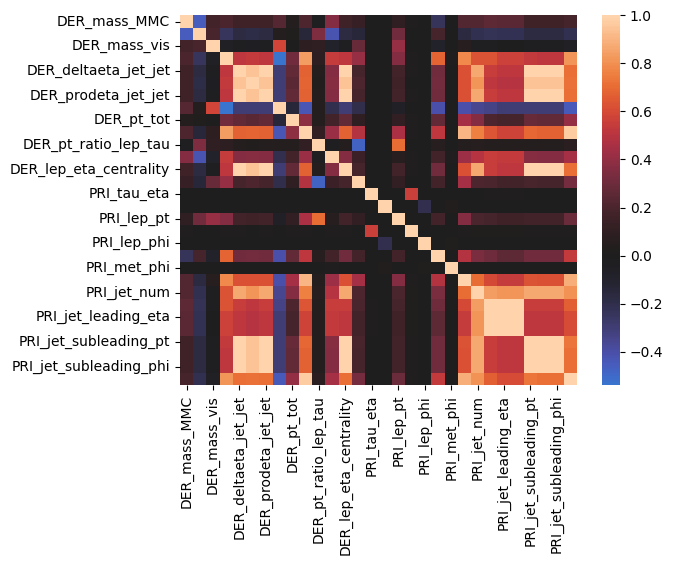

In [ ]:
sns.heatmap(data_frame_input_data.corr(), center=0)

In [73]:
data_frame_input_data_id = data_frame_input_data.copy()
data_frame_input_data_id["id"] = yb


In [74]:
sns.pairplot(data_frame_input_data_id, diag_kind ='hist' , hue="id")
plt.show()

In [ ]:
pd.plotting.scatter_matrix(data_frame_input_data, figsize = [30,30])
plt.show()

KeyboardInterrupt: 

In [ ]:
a,b =np.unique(yb,return_counts=True)
max_is = a[np.argmax(b)]
print(max_is)

-1.0


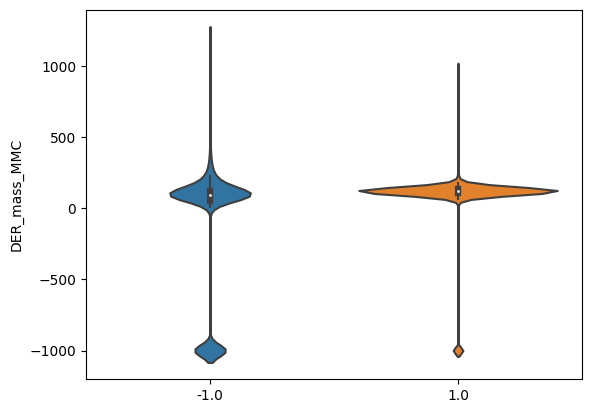

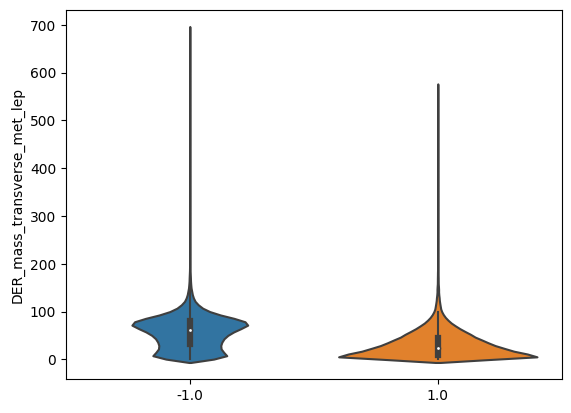

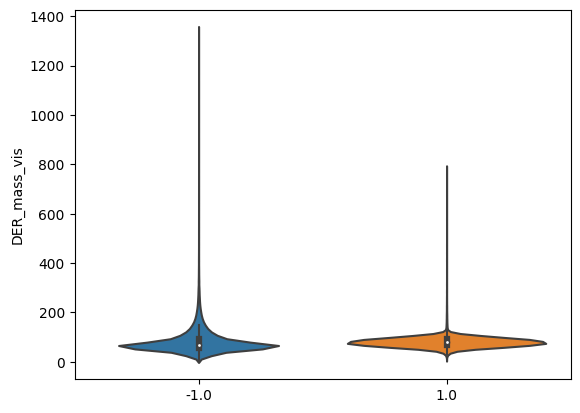

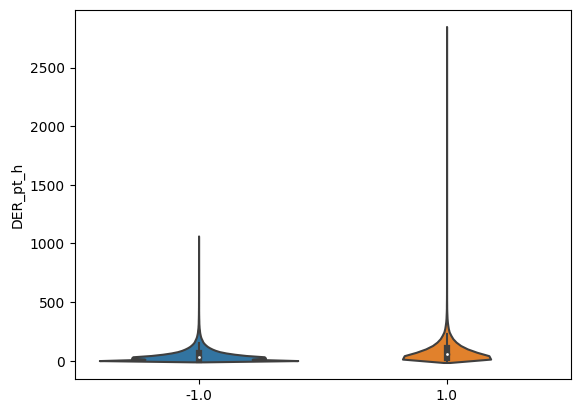

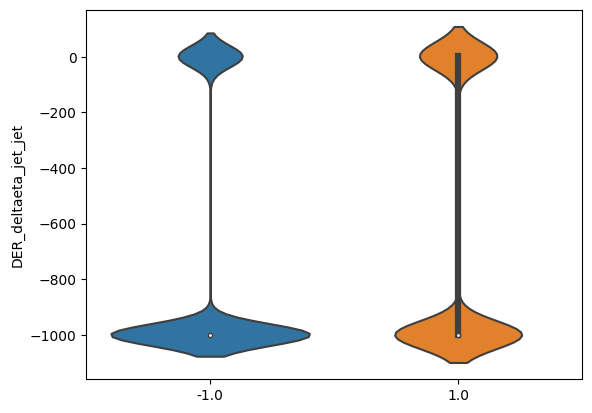

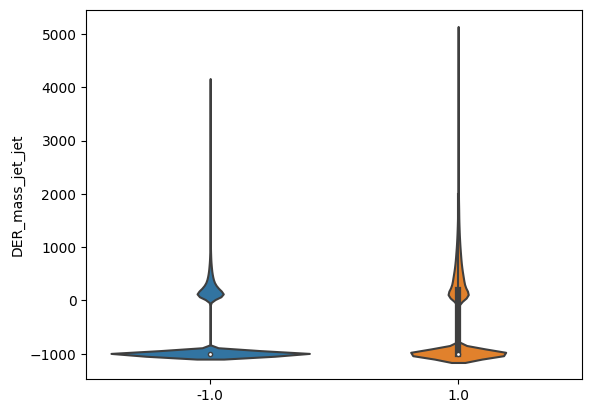

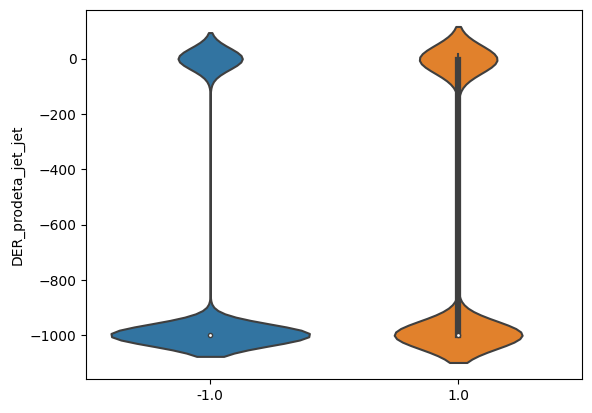

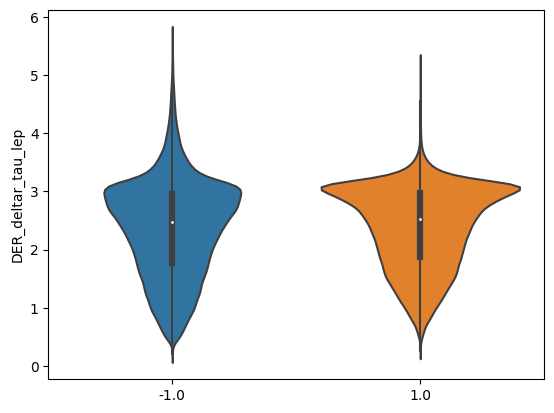

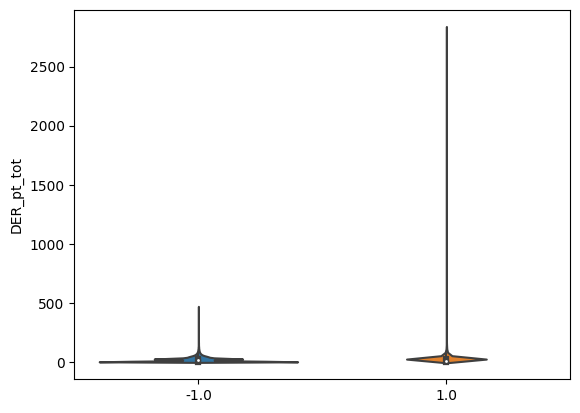

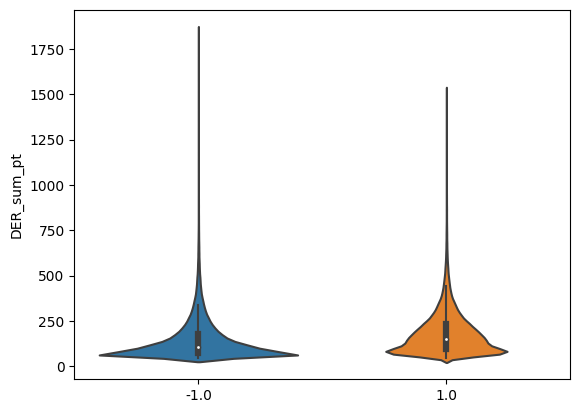

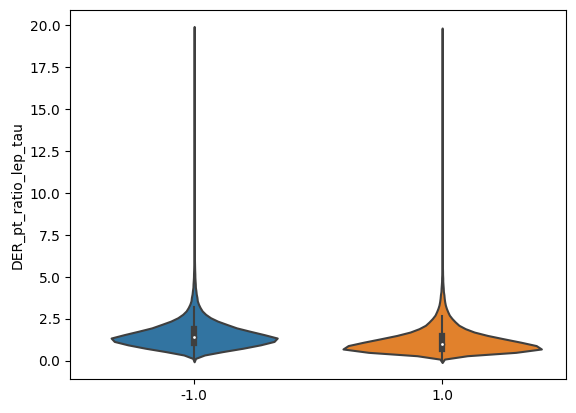

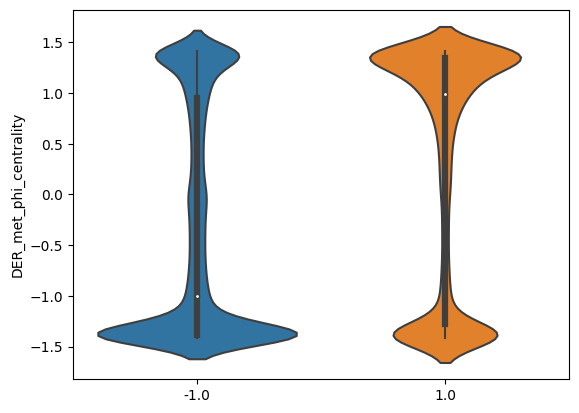

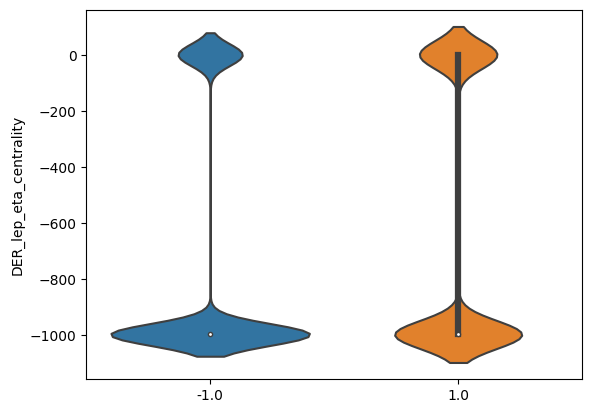

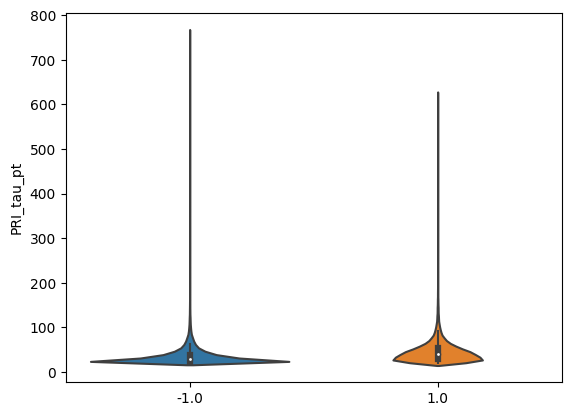

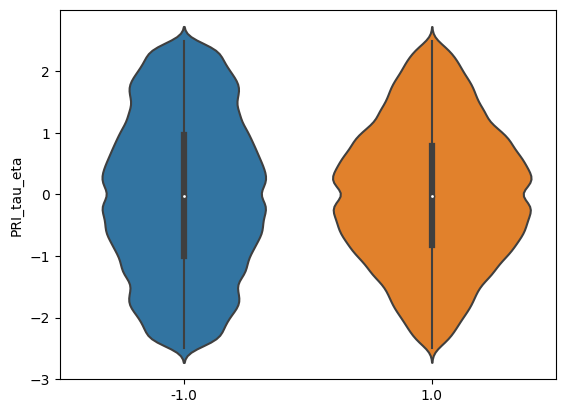

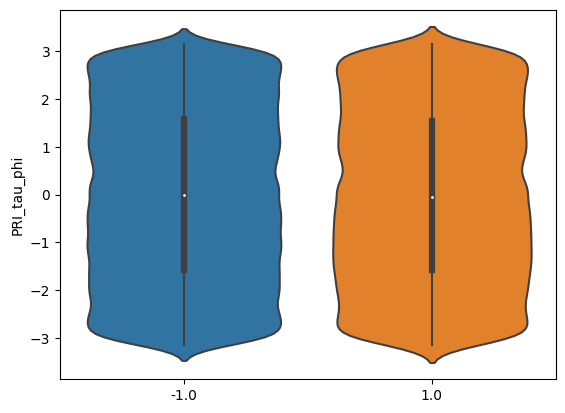

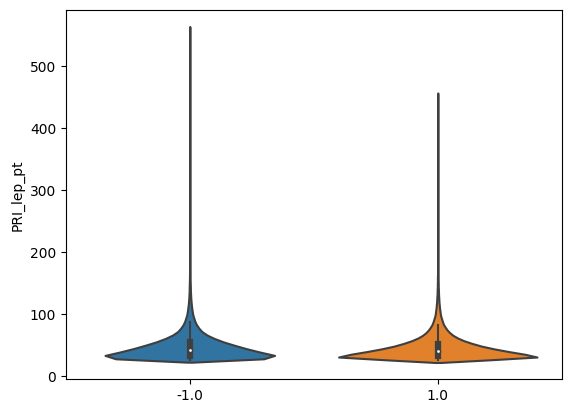

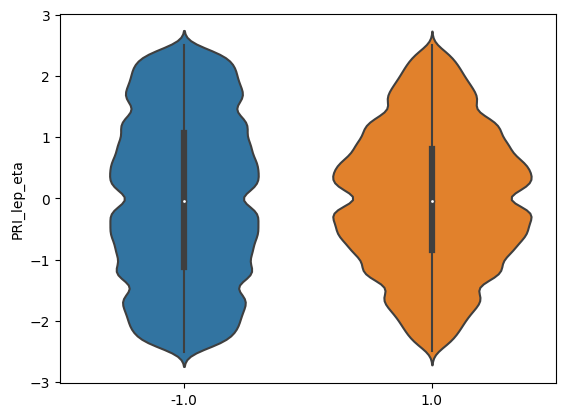

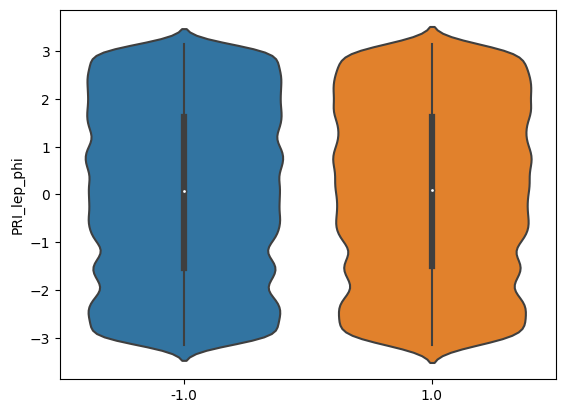

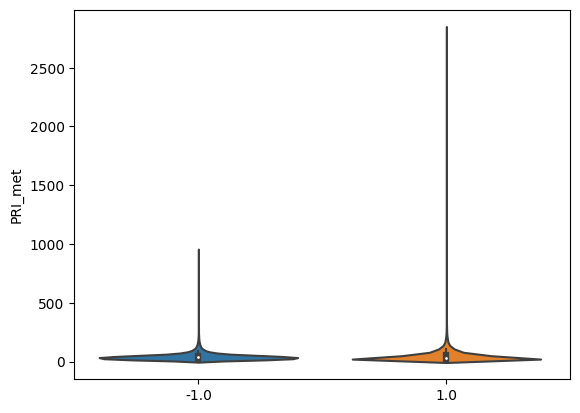

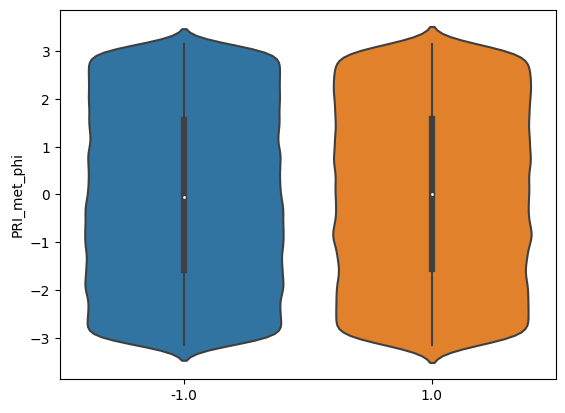

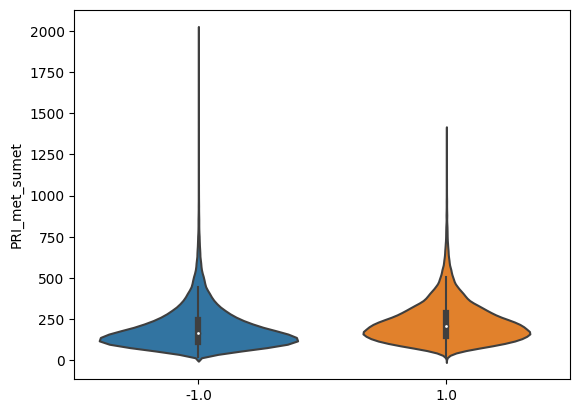

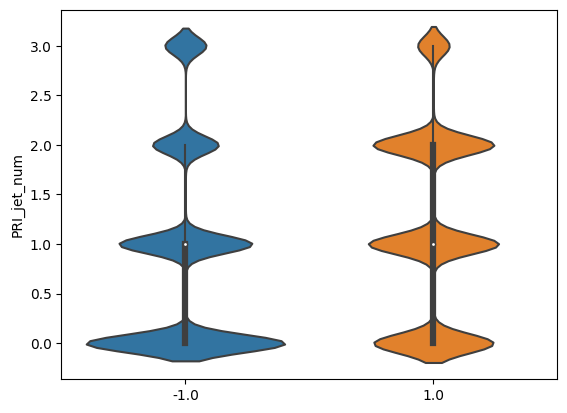

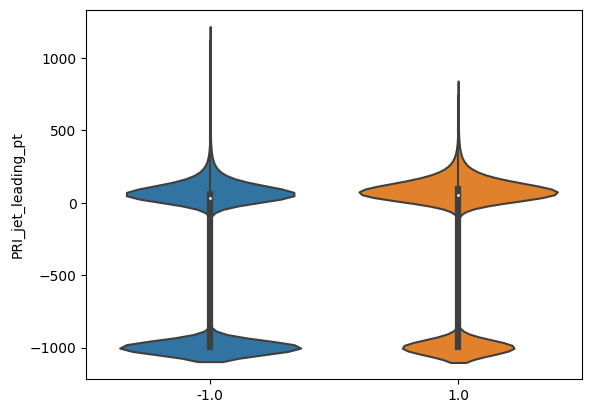

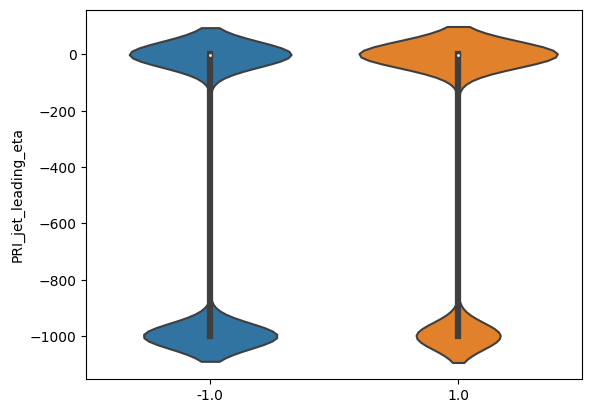

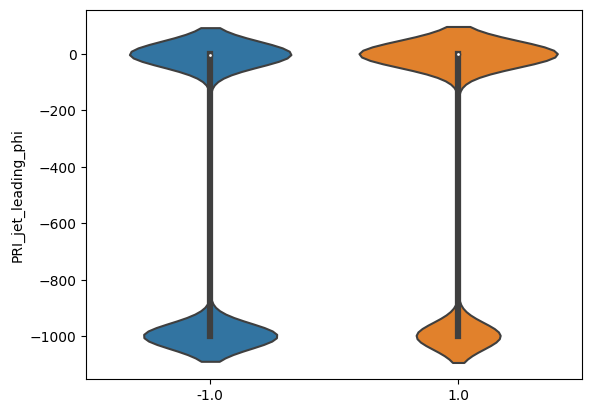

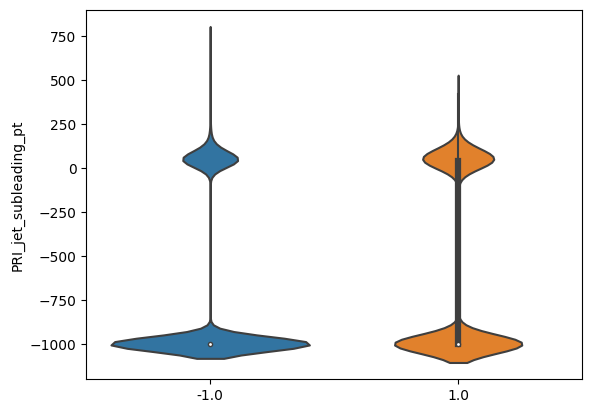

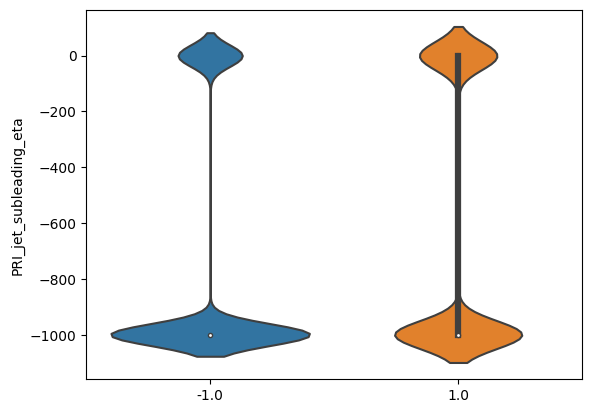

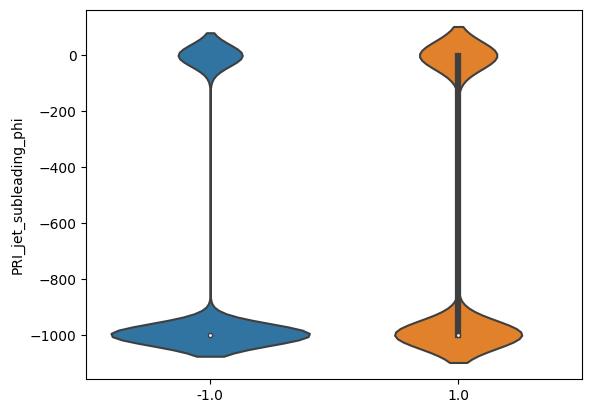

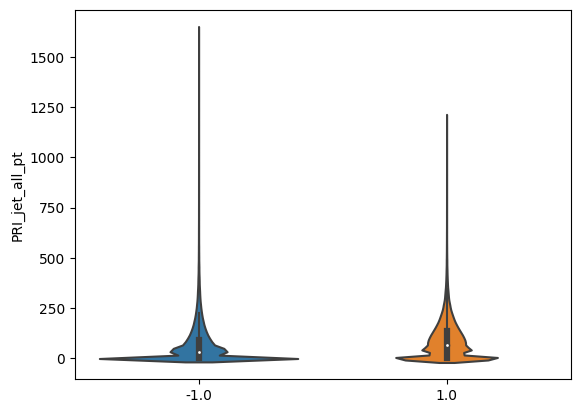

In [71]:

for col in data_frame_input_data.columns:
    sns.violinplot(x=yb,y=data_frame_input_data[col])
    plt.show()
    # plt.scatter(yb,data_frame_input_data[col])
    
    # plt.title(col)
    # plt.show()

In [ ]:

for col in data_frame_input_data.columns:
    plt.scatter(yb,data_frame_input_data[col])
    plt.title(col)
    plt.show()